In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aaryahirodepatil","key":"a79a0980c7f186ff1c0762e2c221b0bc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "nagendra048/aadhar-dataset"

Dataset URL: https://www.kaggle.com/datasets/nagendra048/aadhar-dataset
License(s): unknown


In [ ]:
!unzip aadhar-dataset.zip -d aadhaar_dataset

Streaming output truncated to the last 5000 lines.
  inflating: aadhaar_dataset/test/labels/102_509409293_jpg.rf.08cec237a3dc21e6d4418c03383a8c51.txt  
  inflating: aadhaar_dataset/test/labels/102_509409293_jpg.rf.d6b6e5f32f5267dfd049910dd384bb23.txt  
  inflating: aadhaar_dataset/test/labels/110_504886170_jpg.rf.40fdcccd0e14d19f4bff37d8829cf49f.txt  
  inflating: aadhaar_dataset/test/labels/14171f7e3e906f9bb9cbee0e44b183ab-1-_jpg.rf.08e306a6d8b48d3ee6311bdb46da1ee8.txt  
  inflating: aadhaar_dataset/test/labels/14171f7e3e906f9bb9cbee0e44b183ab-1-_jpg.rf.44fad98a2f2b5c217f49f9d8f7f44e54.txt  
  inflating: aadhaar_dataset/test/labels/14171f7e3e906f9bb9cbee0e44b183ab-1-_jpg.rf.e27d0af90fa71a2553699a70633d37c0.txt  
  inflating: aadhaar_dataset/test/labels/14171f7e3e906f9bb9cbee0e44b183ab_jpg.rf.0881693fc13cfdf4b1f250c7203c2f24.txt  
  inflating: aadhaar_dataset/test/labels/15702284b04c27864e819ad89483b80d_jpg.rf.9fa021dc12fed4af38e193100f100d2b.txt  
  inflating: aadhaar_dataset/test/lab

In [ ]:
!mkdir -p dataset/images/train
!mkdir -p dataset/images/val
!mkdir -p dataset/images/test
!mkdir -p dataset/labels/train
!mkdir -p dataset/labels/val
!mkdir -p dataset/labels/test

In [ ]:
!mv aadhaar_dataset/train/images/* dataset/images/train/
!mv aadhaar_dataset/train/labels/* dataset/labels/train/
# Repeat for val and test

In [ ]:
!mv aadhaar_dataset/test/images/* dataset/images/test/
!mv aadhaar_dataset/test/labels/* dataset/labels/test/

In [ ]:
!mv aadhaar_dataset/valid/images/* dataset/images/val/
!mv aadhaar_dataset/valid/labels/* dataset/labels/val/

In [ ]:
data_yaml = """
train: /content/dataset/images/train
val: /content/dataset/images/val
test: /content/dataset/images/test

nc: 4
names: ['aadhaar_number', 'name', 'dob_gender', 'photo']
"""

with open('/content/data.yaml', 'w') as f:
    f.write(data_yaml)


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17372, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 17372 (delta 42), reused 20 (delta 20), pack-reused 17313 (from 3)
Receiving objects: 100% (17372/17372), 16.24 MiB | 24.53 MiB/s, done.
Resolving deltas: 100% (11904/11904), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s e

In [ ]:
import os

# Path to your labels folder
label_dirs = [
    "/content/dataset/labels/train",
    "/content/dataset/labels/val",
    "/content/dataset/labels/test"
]

max_class_id = 3  # highest allowed class ID (0, 1, 2, 3)

for label_dir in label_dirs:
    for filename in os.listdir(label_dir):
        file_path = os.path.join(label_dir, filename)
        if filename.endswith('.txt'):
            with open(file_path, 'r') as file:
                lines = file.readlines()

            # Filter out lines with invalid class IDs
            valid_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    if class_id <= max_class_id:
                        valid_lines.append(line)
                    else:
                        print(f"Removed invalid class {class_id} in {file_path}")

            # Write back only valid lines
            with open(file_path, 'w') as file:
                file.writelines(valid_lines)


Removed invalid class 4 in /content/dataset/labels/train/Image-Resizer-_-Easily-Resize-Images-Online-for-FREE_jpg.rf.3e43b0aa9604cad31797f7dc851c47e2.txt
Removed invalid class 4 in /content/dataset/labels/train/06_01_2022_03_14_19_png_jpg.rf.c603dab536cab89e20e6d1f803d1e1d7.txt
Removed invalid class 4 in /content/dataset/labels/train/06_01_2022_03_14_30_png_jpg.rf.0b63a1b5d4e949e35bb58d38a967a38f.txt
Removed invalid class 4 in /content/dataset/labels/train/10156_jpg.rf.5b18ab1c6c821fd02297ce7d08718abd.txt
Removed invalid class 4 in /content/dataset/labels/train/10075_jpg.rf.1947dcfaeb787618f167ecfac62ffb9c.txt
Removed invalid class 4 in /content/dataset/labels/train/10115_jpg.rf.0dbe8ecb0b3e7cc967535604c3f5e6cf.txt
Removed invalid class 4 in /content/dataset/labels/train/06_01_2022_03_15_15_png_jpg.rf.acae75724883c720cc8b6ad985e1f7c7.txt
Removed invalid class 4 in /content/dataset/labels/train/10097_jpg.rf.1af6bf50822ea2ee0ce8288d5ea26c73.txt
Removed invalid class 4 in /content/dataset

In [ ]:
#!python train.py --img 640 --batch 16 --epochs 100 --data /content/data.yaml --weights yolov5s.pt --name aadhaar_masker

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      78/99      4.51G    0.01809    0.01399  0.0003811         74        640:  98% 114/116 [00:45<00:00,  2.66it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      78/99      4.51G    0.01808    0.01399  0.0003825         95        640:  99% 115/116 [00:45<00:00,  2.91it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      78/99      4.51G    0.01811    0.01396  0.0004266         42        640: 100% 116/116 [00:45<00:00,  2.54it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 17/17 [00:09<00:00,  1.87it/s]
                   all        529       2047      0.996  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_path = '/content/drive/MyDrive/aadhaar_masker_best.pt'

In [ ]:
#!cp -r /content/yolov5/runs/train/aadhaar_masker /content/drive/MyDrive/aadhaar_training_backup/

In [ ]:
#!python detect.py --weights /content/drive/MyDrive/aadhaar_training_backup/weights/best.pt --img 640 --conf 0.25 --source /content/dataset/images/val/0d4c873ace54e82fb49c451a9bdc6d24_jpg.rf.c77fe47bec3cf1673a64047c2c01b475.jpg

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['/content/drive/MyDrive/aadhaar_training_backup/weights/best.pt'], source=/content/dataset/images/val/0d4c873ace54e82fb49c451a9bdc6d24_jpg.rf.c77fe47bec3cf1673a64047c2c01b475.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CPU



In [ ]:
!python detect.py \
  --weights /content/drive/MyDrive/aadhaar_training_backup/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/dataset/images/test/25305fe9d4d92e3899f5fbcab86fb2c7_jpg.rf.86dde802744b7ece8337002ba468a3fe.jpg\
  --save-txt

detect: weights=['/content/drive/MyDrive/aadhaar_training_backup/weights/best.pt'], source=/content/dataset/images/test/25305fe9d4d92e3899f5fbcab86fb2c7_jpg.rf.86dde802744b7ece8337002ba468a3fe.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/images/test/25305fe9d4d92e3899f5fbcab86fb2c7_jpg.rf.86dde802744b7ece8337002ba468a3fe.jpg: 640x640 1 aadhaar_number, 1 name, 1 dob_gender, 1 photo, 418.4ms
Speed: 4.6ms pre-process, 418.4ms infer

In [ ]:
!pip install easyocr opencv-python pytesseract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 21.4 MB/s eta 0:00:00


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No OCR result for box 0
OCR Extracted [1]: 6965 9098 2472
✅ Valid Aadhaar Detected: 696590982472
No OCR result for box 2
OCR Extracted [3]: Voviau
❌ Not a valid Aadhaar number


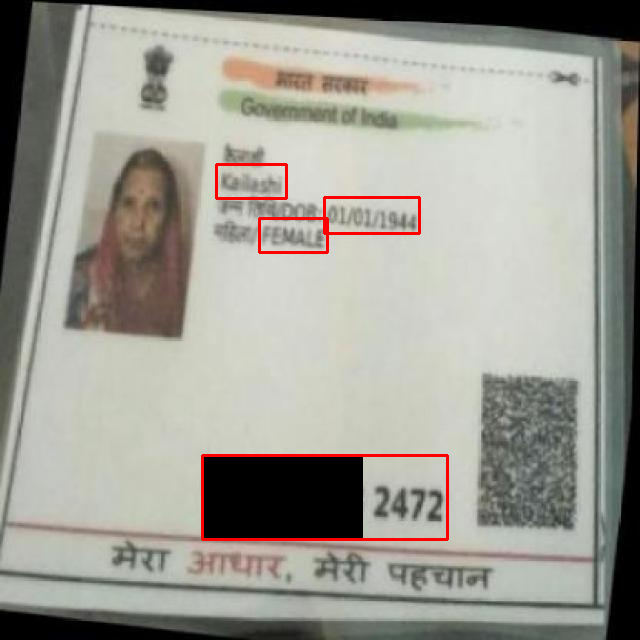

In [51]:
import cv2
import torch
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow
import re

# Load custom YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/aadhaar_training_backup/weights/best.pt')

# Function to check for 12-digit Aadhaar format
def extract_valid_aadhaar(text):
    digits_only = re.sub(r'\D', '', text)  # Remove non-digit characters
    return digits_only if len(digits_only) == 12 else None

# Load image
img = cv2.imread('/content/dataset/images/test/6d8e67208737a556302565d3c61dc373_jpg.rf.c1bd0fc7810710ea840d37754e750cb5.jpg')

# Run YOLO detection
results = model(img)
boxes = results.xyxy[0].cpu().numpy()

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Process each detection box
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box[:4])
    roi = img[y1:y2, x1:x2]

    # OCR
    ocr_result = reader.readtext(roi)
    if ocr_result:
        raw_text = ocr_result[0][1]
        print(f"OCR Extracted [{i}]:", raw_text)

        cleaned = extract_valid_aadhaar(raw_text)
        if cleaned:
            print("✅ Valid Aadhaar Detected:", cleaned)

            # Mask first 8 digits
            digit_width = (x2 - x1) // 12
            mask_x2 = x1 + digit_width * 8

            # Draw black box over first 8 digits
            cv2.rectangle(img, (x1, y1), (mask_x2, y2), (0, 0, 0), -1)
        else:
            print("❌ Not a valid Aadhaar number")
    else:
        print(f"No OCR result for box {i}")

    # Always draw the detected box for debug
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red box to visualize detection

# Save & Show
cv2.imwrite("debug_masked_output.jpg", img)
cv2_imshow(img)